**MNIST Handwritten Digit Classification using machine learning (Neural Network)**

**Importing the dependecies**

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
#from tensorflow.math import Confusion_matrix
from sklearn.metrics import confusion_matrix

**Loading the MNIST data from Keras.datasets**

In [52]:
(X_train,y_train), (X_test,y_test) = mnist.load_data()

In [53]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [54]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [55]:
type(X_train)

numpy.ndarray

In [56]:
#Shape of the nupy array
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)


(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)



Training data = 60,000 Images

and test_data = 10,000 Images

Image dimension --> 28 x 28

Grayscale Image --> 1 channel

In [57]:
#Print the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [58]:
print(X_train[10].shape)

(28, 28)


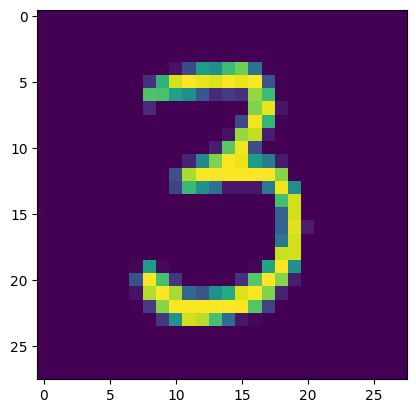

In [59]:
#Display the image
plt.imshow(X_train[50])
plt.show()

In [60]:
#Print the corresponding image
print(y_train[50])


3


**Image Labels**

In [61]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [62]:
#Unique values in y_train
print(np.unique(y_train))

#Unique values in y_test
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**We can use these labels as such or we can also also apply One Hote Encoding**

**All the images have the same dimension in this dataset, if not, we have to resize all the images to a common dimension**

In [63]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [64]:
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [65]:
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

**Building the Newral Network**

In [66]:
#Setting up the layers of Newral Network
model = keras.Sequential([
                         keras.layers.Flatten(input_shape = (28, 28)),
                         keras.layers.Dense(50, activation = "relu"),
                         keras.layers.Dense(50, activation = "relu"),
                         keras.layers.Dense(10, activation = "sigmoid")

])

In [67]:
#Compiling the Newral Network
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

In [68]:
# Training the Newral Network

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3008 - accuracy: 0.9133
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1434 - accuracy: 0.9569
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1037 - accuracy: 0.9681
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0831 - accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0687 - accuracy: 0.9786
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0566 - accuracy: 0.9818
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0500 - accuracy: 0.9840
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0425 - accuracy: 0.9865
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0370 - accuracy: 0.9882
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.

**Training data accuracy = 98.8%**

**Accuracy on test data:**

In [69]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1002 - accuracy: 0.9725


**Test data accuracy = 97.6%**

In [70]:
print(X_test.shape)

(10000, 28, 28)


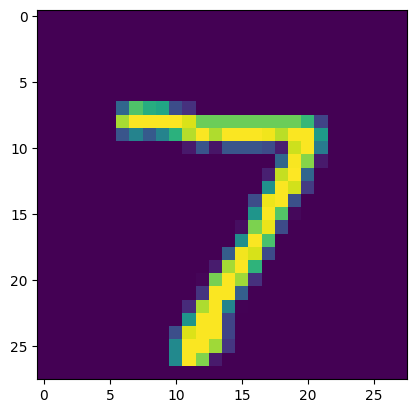

In [71]:
#First data point in X_test
plt.imshow(X_test[0])
plt.show()

In [72]:
print(y_test[0])

7


In [73]:
y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [74]:
print(y_pred.shape)

(10000, 10)


In [75]:
print(y_pred[0])

[2.0544218e-02 4.3373999e-01 4.6462590e-01 9.5579511e-01 1.1104853e-06
 5.8086850e-02 4.5708962e-10 9.9999821e-01 1.8487799e-01 4.0413919e-01]


**Model.predict() gives the prediction probability of each class for the datapoint**

In [76]:
#Converting the prediction to class label
label_for_first_test_image = np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [77]:
# Converting the probabilites to class label for all test data
y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 4, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 5, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 5, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [78]:
print(y_pred)

[[2.05442179e-02 4.33739990e-01 4.64625895e-01 ... 9.99998212e-01
  1.84877992e-01 4.04139191e-01]
 [2.11227573e-02 9.89456654e-01 1.00000000e+00 ... 6.27946938e-05
  2.33396306e-03 2.60619912e-04]
 [1.86614674e-02 9.99784768e-01 1.15535647e-01 ... 6.39260486e-02
  4.59086329e-01 3.27908946e-03]
 ...
 [1.80011702e-04 2.56525446e-03 3.48084868e-05 ... 7.98463225e-01
  1.02345515e-02 9.97914970e-01]
 [3.23349159e-05 1.95498578e-03 4.06373765e-05 ... 1.08705190e-05
  8.90662849e-01 5.39890816e-03]
 [6.67907123e-04 1.00021825e-05 7.77073205e-03 ... 2.42242831e-13
  7.99733773e-03 1.86796777e-03]]




*   y_test --> True label
*   y_pred_labels --> Predicted label

*   Confusion Matrix



In [79]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

In [80]:
print(conf_mat)

[[ 966    0    1    2    0    2    3    1    5    0]
 [   0 1124    3    1    0    1    2    2    2    0]
 [   4    0 1010    4    1    1    1    5    6    0]
 [   0    1    4  969    0   22    0    5    8    1]
 [   0    0    0    1  959    1    6    3    0   12]
 [   1    0    0    6    1  873    4    1    4    2]
 [   2    2    1    1    6   11  932    0    3    0]
 [   3    3    9    2    1    1    0 1004    1    4]
 [   2    1    3    4    5   15    1    3  936    4]
 [   2    3    0    4   21   11    0    7    9  952]]


Text(0.5, 47.7222222222222, 'Predicted labels')

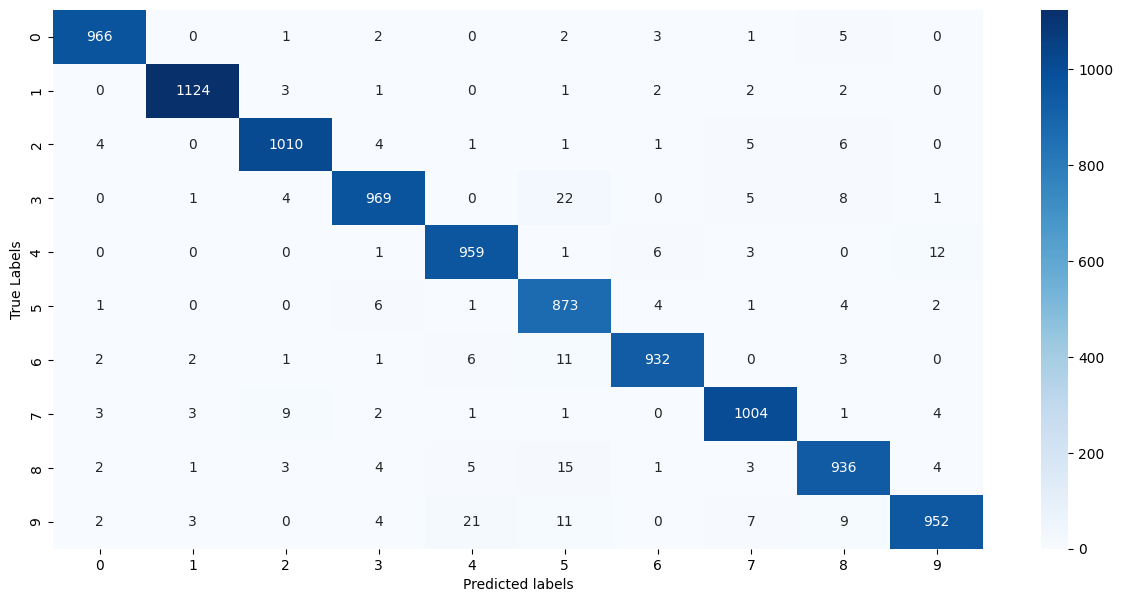

In [81]:
plt.figure(figsize = (15,7))
sns.heatmap(conf_mat, annot = True, fmt = "d", cmap = "Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted labels")



**Building a Predictive System**

In [82]:
input_image_path = "/content/sample_data/images_mnist_2a.png"
input_image = cv2.imread(input_image_path)

In [83]:
type(input_image)

numpy.ndarray

In [84]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


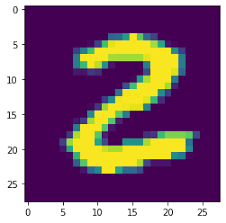

In [85]:
cv2_imshow(input_image)

In [86]:
input_image.shape

(223, 226, 3)

In [88]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [89]:
grayscale.shape

(223, 226)

In [90]:
input_image_resize = cv2.resize(grayscale,(28,28))

In [91]:
input_image_resize.shape

(28, 28)

In [92]:
cv2_imshow(input_image_resize)

In [93]:
input_image_resize/255

array([[1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [1.        , 0.98039216, 1.        , 0.12941176, 0.12941176,
        0.12941176, 0.12941176, 0.12941176, 0.12941176, 0.12941176,
        0.12941176, 0.12941176, 0.12941176, 0.12941176, 0.12941176,
        0.12941176, 0.12941176, 0.12941176, 0.12941176, 0.12941176,
        0.12941176, 0.12941176, 0.12941176, 0.12941176, 0.12941176,
        0.12941176, 0.12941176, 1.        ],
       [1.        , 1.        , 1.        , 0.12941176, 0.12941176,
        0.12941176, 0.12941176, 0.12941176, 0.12941176, 0.12941176,
        0.12941176, 0.12941176, 0.12941176, 0.12941176, 0.12941176,
        0.12941176, 0.1294

In [94]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

In [95]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 67ms/step
[[0. 0. 1. 1. 0. 1. 0. 1. 0. 0.]]


In [96]:
input_pred_label = np.argmax(input_prediction)

In [97]:
print(input_pred_label)

2


Path of the image to be predicted: /content/sample_data/Digit_3.png


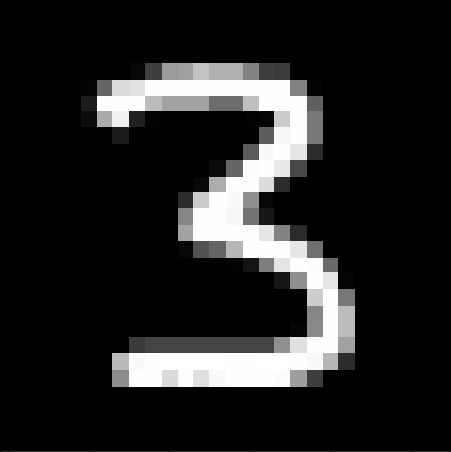

1/1 [==============================] - 0s 23ms/step
The Handwritten Digit is recognised as  3


In [114]:
#Predictive system
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale,(28,28))


input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])


input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The Handwritten Digit is recognised as ", input_pred_label)







